# **Project: Text Sentiment Analysis using Naive Bayes Classifier and Neural Network Models**
<hr>

- **Author**: Uyen Nguyen
- **Date**: April 2024
- **Course**: AI Vietnam - Course 2023

<hr>

## **I. Introduction**

***Text Classification*** is a fundamental task in Natural Language Processing (NLP) that involves assigning labels to text units. These text units can range from individual words to paragraphs or entire documents. For this specific project, we are focusing on sentiment analysis, which involves classifying text as positive or negative. Sentiment analysis is crucial for understanding public opinion, customer feedback, and social media monitoring. In this project, we will build two types of classifiers: Naive Bayes Classifier and Neural Network. By building these models, we can compare their performance and automate the process of determining the sentiment expressed in textual data, which has applications in various domains such as marketing, customer service, and political analysis.

## **II. Dataset Information**
For this project, we are using the NTC-SCV dataset, which is available to access via this [GitHub](https://github.com/congnghia0609/ntc-scv) repository. The NTC-SCV dataset is a collection of Vietnamese text reviews used for sentiment analysis. It contains 50,000 samples, each labeled as either positive or negative. The dataset is specifically designed to help train and evaluate text classification models. Here is a detailed description of the dataset:

The dataset is organized into three main subsets:
- *Training Set*: Contains 30,000 samples used to train the model.
- *Validation Set*: Contains 10,000 samples used to tune the model and prevent overfitting.
- *Test Set*: Contains 10,000 samples used to evaluate the final model's performance.

Each subset is further divided into two categories:
- *Positive Reviews*: Reviews that express a positive sentiment, labeled as 1.
- *Negative Reviews*: Reviews that express a negative sentiment, labeled as 0.

The data is stored in directories with each review saved as a text file. The directory structure is as follows:
```data/
├── train/
│   ├── pos/
│   └── neg/
├── valid/
│   ├── pos/
│   └── neg/
└── test/
    ├── pos/
    └── neg/
```
Examples of positive sentiment reviews might include praise for a product, positive feedback on a service, or general expressions of satisfaction. Negative sentiment reviews, on the other hand, might include complaints, expressions of dissatisfaction, or criticisms.

By leveraging the NTC-SCV dataset, we can develop and evaluate sentiment analysis models tailored to the Vietnamese language, contributing to advancements in NLP for underrepresented languages and providing practical tools for various real-world applications.

## **III. Project Framework**

In this project, we will train a sentiment text classification model using both Naive Bayes and Neural Network approaches. Here are the general steps of the project:

1. **Data Acquisition and Loading**: Initially, we will clone the dataset directly from a GitHub source, unzip it, and load it into our notebook.

2. **Text Data Preprocessing**: We will clean and prepare the text data for modeling by removing special characters, stop words, and other irrelevant data. Additionally, we will normalize the text by lowercasing, correcting typos, and converting abbreviations.

3. **Vector Representation**: After preprocessing, the text data will be converted into a numerical format that machine learning algorithms can process. We will achieve this by transforming the text into vectors using word embeddings.

4. **Building the Classification Models**: With the text data in a usable format, we will construct two models for classification: a Naive Bayes classifier and a Neural Network model.

5. **Model Training**: During this phase, the models learn to associate the input text vectors with the correct labels. This is achieved by adjusting the network weights based on a loss function. We will also set aside a portion of the dataset for validation to monitor for overfitting and fine-tune the model parameters.

6. **Prediction and Model Evaluation**: Finally, we will use the trained models to predict the labels of new, unseen text data. The models' performance will be evaluated using metrics such as accuracy, precision, recall, and F1-score to determine their generalization capabilities on new data.

These steps outline the essential framework for training a neural network to effectively classify text data, ensuring the models are both accurate and robust.

## **IV. Project Implementation**
### **1. Import Neccesary Libraries**
First, we will import all necessaries libraries for this project. For now, we will import basic libraries that usually use in Machine Learning. As we go through the project, we will import more libraries if necessary.

In [1]:
# Import necessary for the projects
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **2. Data Cloning and Loading**
For our project, we will clone the original [GitHub](https://github.com/congnghia0609/ntc-scv) link accessed to the NTC-SCV dataset to our local environment and unzip those files as follows:

In [ ]:
# Download the dataset from github
!git clone https://github.com/congnghia0609/ntc-scv
!unzip ./ntc-scv/data/data_test.zip -d ../data
!unzip ./ntc-scv/data/data_train.zip -d ../data
!rm -rf ./ntc-scv

After unzipping, we have obtained a new `data` folder with two subfolders, `data_test` and `data_set`, which we will use for training and testing our model as we progress. Now, we will define a function to read the files in these folders and store them in variables as follows:

In [3]:
# Define function to read data from file
def load_data_from_path(folder_path):
    examples = []
    for label in os.listdir(folder_path):
        full_path = os.path.join(folder_path, label)
        for file_name in os.listdir(full_path):
            file_path = os.path.join(full_path, file_name)
            with open(file_path, "r", encoding='utf-8') as f:
                linens = f.readlines()
            sentence = " ".join(linens)
            if label == "neg":
                label = 0
            if label == "pos":
                label = 1
            data = {
                'sentence'  : sentence,
                'label'     : label
            }
            examples.append(data)
    return pd.DataFrame(examples)

Then, using the function above along with the distribution of the dataset, we will store the data we just cloned into three distinct variables: `train_df` for the training data, `valid_df` for the validation data, and `test_df` for the testing data.

In [4]:
# Declare the path to specific data folder
folder_path = {
    'train': '../data/data_train/train',
    'valid': '../data/data_train/test',
    'test' : '../data/data_test/test'
}

# Load data to corresponding variables
train_df = load_data_from_path(folder_path['train'])
valid_df = load_data_from_path(folder_path['valid'])
test_df  = load_data_from_path(folder_path['test'])

For a quick sanity check, we will use some basic `pandas` methods to inspect the data we have loaded into the three variables: `train_df`, `valid_df`, and `test_df`. We will start with a quick check of the training dataset stored in `train_df`. The other two variables can be inspected using similar strategies:

In [19]:
# First ten rows of the train_df dataframe
train_df.head(10)

,sentence,label
0,Quán đồ_ăn khá ngon . . nhưng phục_vụ không tố...,0
1,"Hôm_nay đi ăn tại quán , món ăn ngon vừa_miệng...",0
2,Qua ́ n cư ̣ c ngon . Tuâ ̀ n na ̀ o mi ̀ nh c...,0
3,"Chán , đồ uống khá nhạt . Với không_gian và ch...",0
4,"Mì ăn ok 👍 🏻 👍 🏻 👍 🏻 nhưng nguội , view rộng ,...",0
5,"Bữa có ghé đây ăn , súp chỉ bán tô , 1 tô 15k ...",0
6,Tối mình có mua tàu_hũ bên này . Combo 2 bao_g...,0
7,- Vị_trí : Đường vào thì khá dễ tìm nhưng khi ...,0
8,"Ngoài không_gian thoáng_đãng , rộng_rãi . Quán...",0
9,Uwifi quá chậm\n Nhân_viên phục_vụ rất chảnh\n...,0


As we can see, `train_df` contains reviews in Vietnamese for various restaurants. It has two variables: `sentence` for the reviews and `label` for labeling the type of reviews. All of the first ten sentences are labeled 0, indicating that they are all negative comments. It is also worth to note that the reviews in the `sentence` column have an inconsistent format; some contain underscores (_), some lack proper diacritics, and others include icons. These issues will be our initial focus in the later data normalization step.

In [6]:
# Summarized information of the train_df dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  30000 non-null  object
 1   label     30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


The `train_df` variable contains 30,000 entries, which is consistent with our expectations based on the dataset's description. Additionally, there are no missing values, which is a positive sign for our model training process later on.

### **3. Exploratory Data Analysis (EDA)**
Now, we will some additional libraries and methods to better understand our datasets. First, we want to see how balanced the positive reviews are compared to the negative reviews.

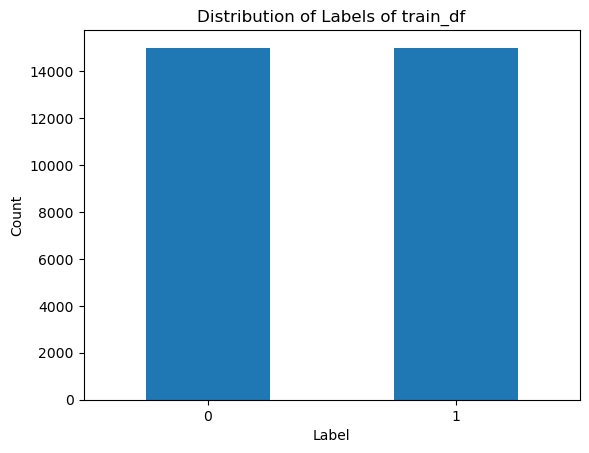

In [26]:
# Categories distribution for train_df dataframe
label_counts = train_df['label'].value_counts()
label_counts.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Label')
plt.xticks(rotation=0)  
plt.title('Distribution of Labels of train_df')
plt.show()

Indeed, we have a balanced dataset for training, where half of the reviews are positive and the other half are negative. This is a good sign, as it means we don't have to implement extra algorithms to rebalance the data.

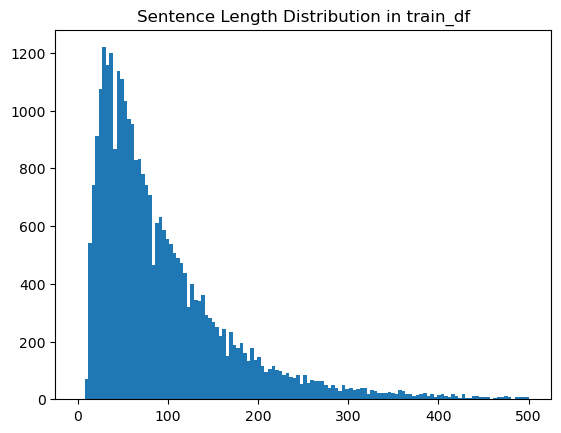

In [29]:
# Length of review comments in train_df dataframe
plt.hist([len(sentence.split()) for sentence in train_df['sentence']], bins=128, range=(0, 500))
plt.title('Sentence Length Distribution in train_df')
plt.show()

The histogram shows a clear peak around the 0-50 range, indicating that most sentences are relatively short. The distribution is right-skewed, with sentence lengths tapering off as they increase, extending up to around 500 characters. There are fewer long sentences, but some do reach lengths of over 400 characters. These might be complex sentences or include multiple clauses.

### **4. Data Preprocessing**